In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
driving_data = pd.read_csv('./340742548_T_NPTS_PERSON_1995(1).csv')

In [5]:
driving_data.columns

Index(['HOUSEID', 'PERSONID', 'PROXY', 'R_AGEFLG', 'REF_ROST', 'R_AGE',
       'R_SEX', 'R_RELAT', 'DRIVER', 'DTCONJ',
       ...
       'WTINDMAN', 'WTINDTRN', 'WTINDWHL', 'WTINDRET', 'WTINDFIN', 'WTINDSVC',
       'WORKLOC', 'YEARMIL2', 'YEAR', 'HHCMSA_NM'],
      dtype='object', length=179)

I parsed out only the relevant columns that we'd use in our analysis

In [6]:
abridged_driving_data = driving_data[["R_AGE", "R_SEX", "YEARMILE", "CENSUS_D", "CENSUS_R"]]
abridged_driving_data.columns = ["Age", "Numeric_Gender", "Yearly_Mileage", "CENSUS_D", "CENSUS_R"]

Based on sanity checking, i knew to cut out values above 200 000 miles per year

In [7]:
legit_mileage_data = abridged_driving_data[abridged_driving_data.Yearly_Mileage <200001]

In [8]:
legit_mileage_data["Yearly_Mileage"] = legit_mileage_data["Yearly_Mileage"].apply(np.int64)

/Users/robertdiaz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
legit_mileage_data.columns

Index(['Age', 'Numeric_Gender', 'Yearly_Mileage', 'CENSUS_D', 'CENSUS_R'], dtype='object')

I replaced the numeric gender code with Male and Female

In [10]:
def gender_type(gender_code):
    result = False
    if (gender_code) == 1:
        result = "Male"
    elif (gender_code) == 2:
        result = "Female"
    elif (gender_code) == 3:
        result = "Unknown"
    return result

legit_mileage_data["Gender"] = legit_mileage_data.Numeric_Gender.apply(gender_type)

/Users/robertdiaz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


I created a Daily Mileage column

In [31]:
legit_mileage_data["Daily Mileage"] = (legit_mileage_data.Yearly_Mileage / 365)
legit_mileage_data.head()

/Users/robertdiaz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Age,Numeric_Gender,Yearly_Mileage,CENSUS_D,CENSUS_R,Gender,Daily Mileage,AgeRange,Yearly CO2,Daily CO2
0,33,2,12000,1,1,Female,32.876712,30 - 36,4800.0,13.150685
1,52,1,15000,1,1,Male,41.095890,51 - 57,6000.0,16.438356
2,26,2,20000,1,1,Female,54.794521,23 - 29,8000.0,21.917808
5,56,1,15000,1,1,Male,41.095890,51 - 57,6000.0,16.438356
7,56,2,15000,1,1,Female,41.095890,51 - 57,6000.0,16.438356


In [12]:
legit_mileage_data.Gender.value_counts()

Female    33330
Male      32388
Name: Gender, dtype: int64

I used cut to create categorical age ranges.

In [13]:
#ranges = [16, 20, 35, 55, 65, 88]
#labels = ["16-19", "20-34", "35-54", "55-64", "65+"]
ranges = [16, 23, 30, 37, 44, 51, 58, 65, 72, 79, 86]
labels = ["16 - 22", "23 - 29", "30 - 36", "37 - 43", "44 - 50", "51 - 57", "58 - 64", "65 - 71", "72 - 78", "79 +" ]



In [32]:
legit_mileage_data["AgeRange"] = pd.cut(legit_mileage_data.Age, ranges, labels=labels, right=False, include_lowest=True)
legit_mileage_data.head()

/Users/robertdiaz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Age,Numeric_Gender,Yearly_Mileage,CENSUS_D,CENSUS_R,Gender,Daily Mileage,AgeRange,Yearly CO2,Daily CO2
0,33,2,12000,1,1,Female,32.876712,30 - 36,4800.0,13.150685
1,52,1,15000,1,1,Male,41.095890,51 - 57,6000.0,16.438356
2,26,2,20000,1,1,Female,54.794521,23 - 29,8000.0,21.917808
5,56,1,15000,1,1,Male,41.095890,51 - 57,6000.0,16.438356
7,56,2,15000,1,1,Female,41.095890,51 - 57,6000.0,16.438356


I created yearly and daily CO2 emissions by multiplying mileage columns by 0.4 kg/mile

In [33]:
legit_mileage_data["Yearly CO2"]= legit_mileage_data.Yearly_Mileage * 0.4
legit_mileage_data["Daily CO2"]= legit_mileage_data["Daily Mileage"] * 0.4
legit_mileage_data.head()

/Users/robertdiaz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/robertdiaz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Age,Numeric_Gender,Yearly_Mileage,CENSUS_D,CENSUS_R,Gender,Daily Mileage,AgeRange,Yearly CO2,Daily CO2
0,33,2,12000,1,1,Female,32.876712,30 - 36,4800.0,13.150685
1,52,1,15000,1,1,Male,41.095890,51 - 57,6000.0,16.438356
2,26,2,20000,1,1,Female,54.794521,23 - 29,8000.0,21.917808
5,56,1,15000,1,1,Male,41.095890,51 - 57,6000.0,16.438356
7,56,2,15000,1,1,Female,41.095890,51 - 57,6000.0,16.438356


I created sub dataframes that were grouped by age range and gender to examine yearly and daily mileage.

In [16]:
legit_mileage_data
yearly_mileage = legit_mileage_data[["AgeRange", "Gender", "Yearly_Mileage"]]
yearly_mileage
daily_mileage = legit_mileage_data[["AgeRange", "Gender", "Daily Mileage"]]
yearly_CO2 = legit_mileage_data[["AgeRange", "Gender", "Yearly CO2"]]
daily_CO2 = legit_mileage_data[["AgeRange", "Gender", "Daily CO2"]]

In [17]:
daily_mileage_final = daily_mileage.groupby(["Gender", "AgeRange"]).mean()

In [22]:
daily_CO2_final = daily_CO2.groupby(["Gender", "AgeRange"]).mean()

I experimented with plottign and found that because the dataframe was multiindexed, all bars are the same color.

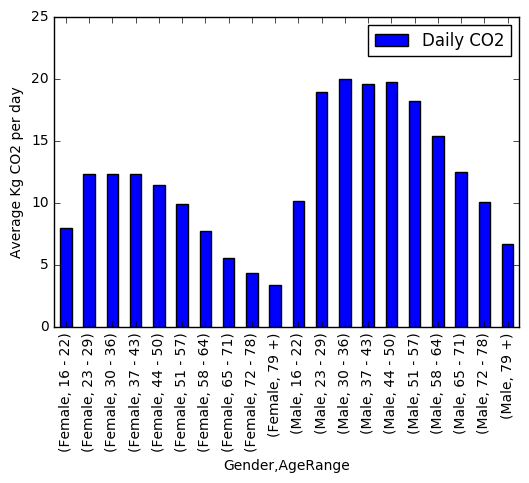

In [18]:
daily_CO2.groupby(["Gender", "AgeRange"]).mean().plot(kind='bar')
plt.ylabel("Average Kg CO2 per day")

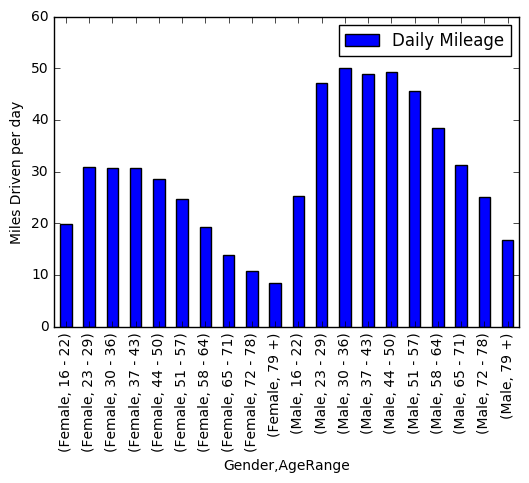

In [19]:
daily_mileage.groupby(["Gender", "AgeRange"]).mean().plot(kind='bar')
plt.ylabel("Miles Driven per day")

I resolved the multi-indexing problem with one color plotting by unstacking the dataframes and plottign them.

In [24]:
dayCO2_unstack = daily_CO2_final.unstack(level=-1)
dayCO2_unstack


Daily CO2                                                         \
AgeRange    16 - 22    23 - 29    30 - 36    37 - 43    44 - 50    51 - 57   
Gender                                                                       
Female     7.985979  12.355025  12.323634  12.297505  11.453444   9.901762   
Male      10.132253  18.898915  20.018924  19.540923  19.723751  18.229620   

                                                     
AgeRange    58 - 64    65 - 71    72 - 78      79 +  
Gender                                               
Female     7.738597   5.522216   4.298019  3.372817  
Male      15.384545  12.517391  10.039453  6.710696

In [28]:
dayMiles_unstack = daily_mileage_final.unstack(level=-1)
dayMiles_unstack

Daily Mileage                                                         \
AgeRange       16 - 22    23 - 29    30 - 36    37 - 43    44 - 50    51 - 57   
Gender                                                                          
Female       19.964947  30.887562  30.809086  30.743762  28.633610  24.754406   
Male         25.330631  47.247288  50.047311  48.852308  49.309376  45.574050   

                                                      
AgeRange    58 - 64    65 - 71    72 - 78       79 +  
Gender                                                
Female    19.346492  13.805540  10.745048   8.432042  
Male      38.461363  31.293478  25.098632  16.776740

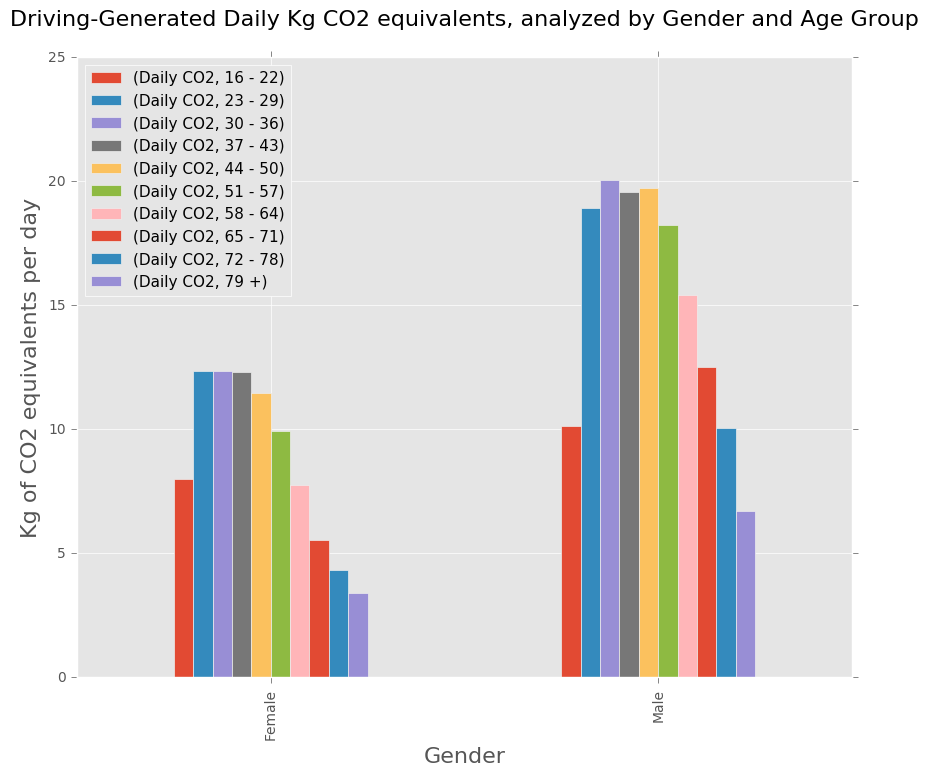

In [27]:
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,8))
ax = dayCO2_unstack.plot.bar(ax=ax)
ax.legend(loc='upper left', fontsize=11)
plt.title("Driving-Generated Daily Kg CO2 equivalents, analyzed by Gender and Age Group", y=1.04,size=16)
plt.xlabel("Gender", size=16)
plt.ylabel("Kg of CO2 equivalents per day", size=16)
plt.savefig('CO2perDay_Driving_GenderAge.png')

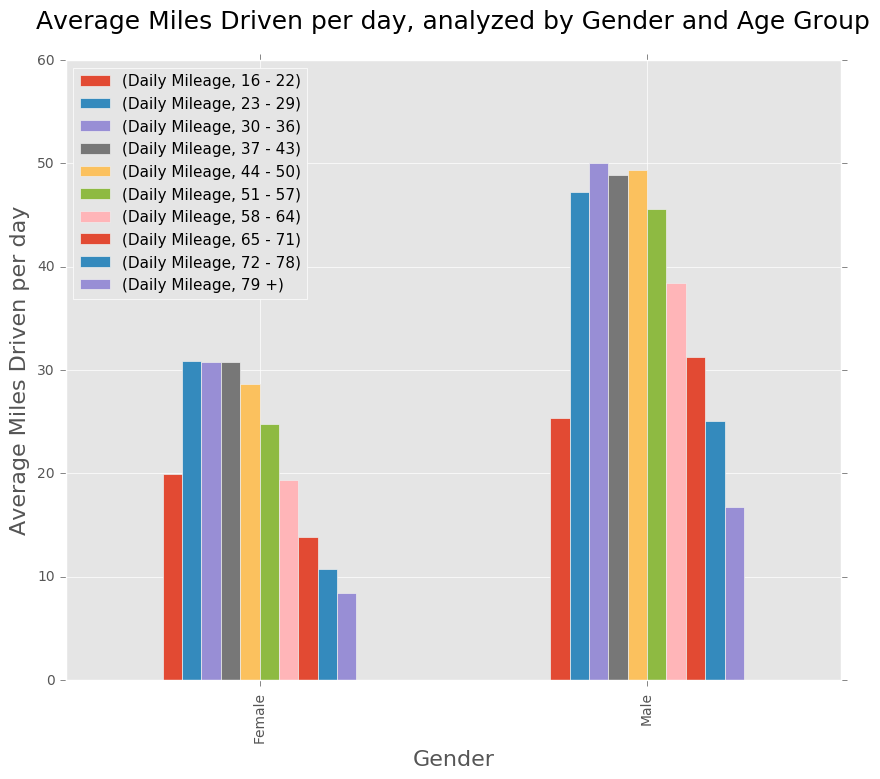

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
ax = dayMiles_unstack.plot.bar(ax=ax)
ax.legend(loc='upper left', fontsize=11)
plt.title("Average Miles Driven per day, analyzed by Gender and Age Group", y=1.04,size=18)
plt.xlabel("Gender", size=16)
plt.ylabel("Average Miles Driven per day", size=16)
plt.savefig('Miles_perDay_Driving_GenderAge.png')